### 피마 인디언 당뇨병 예측
- 최적 모델 찾기, 조기 종료

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/pima-indians-diabetes.csv', skiprows=9, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- 데이터 전처리

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:,:-1].values)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df[8].values, stratify=df[8].values, test_size=0.2, random_state=seed
)

- 모델 정의/설정/학습

In [8]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [9]:
model = Sequential([
    Dense(20, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),        # 8 * 20 + 8(weight)
    Dense(1, activation='sigmoid')      # 1 * 8 + 1(bias)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 8)                 168       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 357 (1.39 KB)
Trainable params: 357 (1.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Callback 사용하지 않고 실행

In [10]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=200, batch_size=100, verbose=0)
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7727


[0.5256069302558899, 0.7727272510528564]

In [11]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

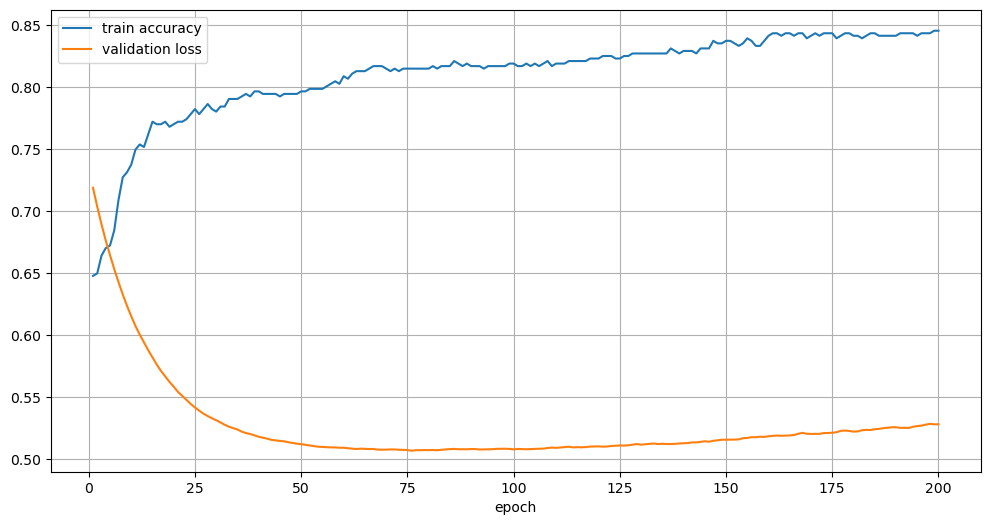

In [12]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()

- Callback 사용

In [13]:
model2 = Sequential([
    Dense(20, input_dim=8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [14]:
mc = ModelCheckpoint('models/pima_best.h5', monitor='val_loss',
                     verbose=0, save_best_only=True)
# best를 찾은 뒤 10회 epoch 동안 best가 나오지 않으면, 학습을 강제 종료함.
es = EarlyStopping(monitor='val_loss', patience=10)        # val_loss = default 안해도 됨

In [16]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                  epochs=200, batch_size=100, verbose=0,
                  callbacks=[mc, es])

In [17]:
best_model = load_model('models/pima_best.h5')
best_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7857


[0.4775877594947815, 0.7857142686843872]

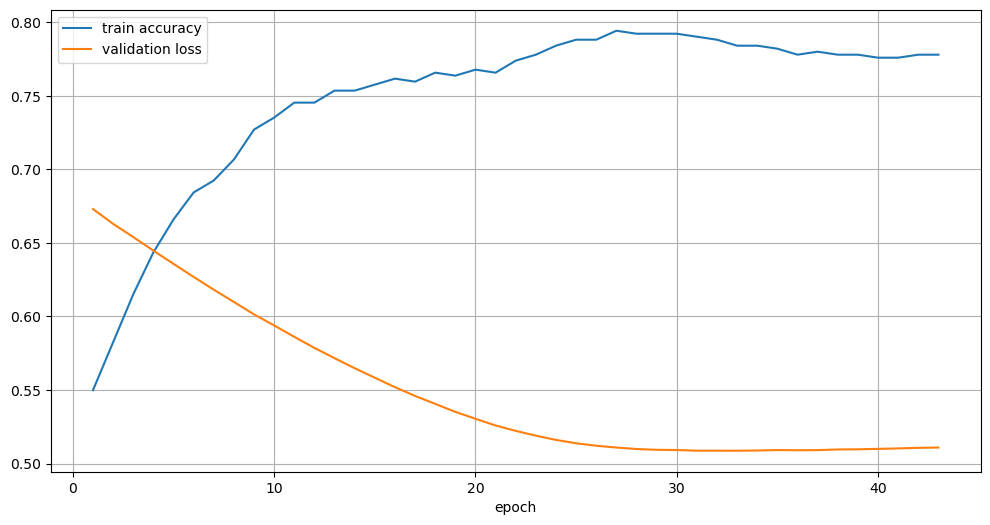

In [19]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

plt.figure(figsize=(12,6))
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()